In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

original_data_dir = 'train'
augmented_data_dir = 'augmented_train'

os.makedirs(augmented_data_dir, exist_ok=True)

def generate_augmented_data():
    output_dir = os.path.join(augmented_data_dir, f"augmented_data")
    os.makedirs(output_dir, exist_ok=True)
    
    for class_name in os.listdir(original_data_dir):
        class_path = os.path.join(original_data_dir, class_name)
        output_class_dir = os.path.join(output_dir, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = load_img(img_path, target_size=(150, 150))  # Load image
                img_array = img_to_array(img)  # Convert to array

                # Apply rotation
                datagen = ImageDataGenerator(rotation_range=0)  
                rotated_img = datagen.apply_transform(img_array, {'theta': 0})
                save_img(os.path.join(output_class_dir, f"rotated_{0}_{img_name}"), rotated_img)

                rotated_img = datagen.apply_transform(img_array, {'theta': 90})
                save_img(os.path.join(output_class_dir, f"rotated_{90}_{img_name}"), rotated_img)

                rotated_img = datagen.apply_transform(img_array, {'theta': 180})
                save_img(os.path.join(output_class_dir, f"rotated_{180}_{img_name}"), rotated_img)

                rotated_img = datagen.apply_transform(img_array, {'theta': 270})
                save_img(os.path.join(output_class_dir, f"rotated_{270}_{img_name}"), rotated_img)

                datagen = ImageDataGenerator(horizontal_flip=True)
                flipped_h_img = datagen.apply_transform(img_array, {'flip_horizontal': True})
                save_img(os.path.join(output_class_dir, f"flipped_h_{img_name}"), flipped_h_img)


              

/Users/hosein/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
generate_augmented_data() 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

augmented_data_dirf = 'new_data'
test_dir = 'test'

def prepare_combined_data():
    datagen = ImageDataGenerator(rescale=1.0 / 255.0,validation_split=0.25)

    train_data = datagen.flow_from_directory(
        augmented_data_dirf,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training'
    )

    validation_data = datagen.flow_from_directory(
        augmented_data_dirf,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation'
    )

    test_data = ImageDataGenerator(rescale=1.0 / 255.0).flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
)
    return train_data , validation_data , test_data

train_data , validation_data , test_data = prepare_combined_data()

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [4]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

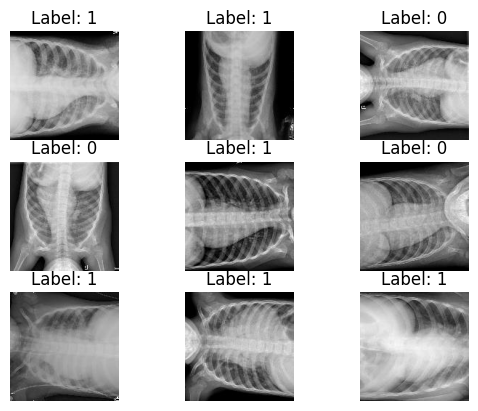

In [50]:
import matplotlib.pyplot as plt

images, labels = next(train_data)  

# Visualize the first few images in the batch
for i in range(9): 
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")  
    plt.axis('off')
plt.show()


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # Early Stopping: Stops training when validation loss stops improving
# early_stop = EarlyStopping(
#     monitor="val_loss",
#     patience=5,  # Stop if val_loss doesn't improve for 5 epochs
#     restore_best_weights=True
# )

# Model Checkpoint: Saves the best model
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)


Six Conv2D

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(256, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train the model
def train_model(model, train_data, validation_data):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=50,
        verbose=1,
        callbacks=[checkpoint]  
    )
    return history

model = create_cnn_model()
history = train_model(model, train_data, validation_data)


Epoch 1/50


/Users/hosein/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/hosein/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.7677 - loss: 0.5235
Epoch 1: val_loss improved from inf to 3.09767, saving model to best_model.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 798ms/step - accuracy: 0.7693 - loss: 0.5203 - val_accuracy: 0.5000 - val_loss: 3.0977
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.9129 - loss: 0.2150
Epoch 2: val_loss did not improve from 3.09767
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 766ms/step - accuracy: 0.9131 - loss: 0.2147 - val_accuracy: 0.5000 - val_loss: 3.8549
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9392 - loss: 0.1556
Epoch 3: val_loss did not improve from 3.09767
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 770ms/step - accuracy: 0.9393 - loss: 0.1555 - val_accuracy: 0.5000 - val_loss: 3.6442
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.9544 - loss: 0.1132
Epoch 4: val_loss did not improve from 3.09767
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 798ms/step - accuracy: 0.9545 - loss: 0.1132 - val_accuracy:

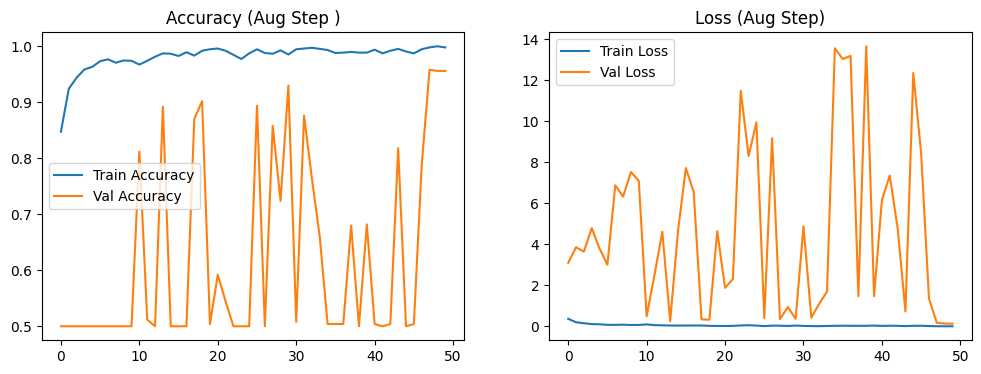

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title(f'Accuracy (Aug Step )')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f'Loss (Aug Step)')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step
Confusion Matrix:
 [[23 17]
 [15 25]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.61      0.57      0.59        40
   PNEUMONIA       0.60      0.62      0.61        40

    accuracy                           0.60        80
   macro avg       0.60      0.60      0.60        80
weighted avg       0.60      0.60      0.60        80



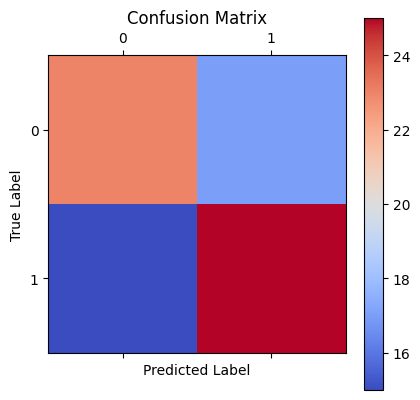

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model
def evaluate_model(model, test_data):
    y_true = test_data.classes
    y_pred = (model.predict(test_data) > 0.5).astype("int32").flatten()

    # Calculate metrics
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA'])
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)

    # Plot confusion matrix
    plt.matshow(cm, cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

evaluate_model(model, test_data)


five Conv2D

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(256, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train the model
def train_model(model, train_data, validation_data):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=20,
        verbose=1 
    )
    return history

model = create_cnn_model()
history = train_model(model, train_data, validation_data)


Epoch 1/20


/Users/hosein/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 815ms/step - accuracy: 0.8323 - loss: 0.3954 - val_accuracy: 0.5000 - val_loss: 5.3896
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 793ms/step - accuracy: 0.9464 - loss: 0.1402 - val_accuracy: 0.5000 - val_loss: 7.7498
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 835ms/step - accuracy: 0.9587 - loss: 0.1114 - val_accuracy: 0.5000 - val_loss: 2.8964
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 874ms/step - accuracy: 0.9573 - loss: 0.1117 - val_accuracy: 0.5000 - val_loss: 4.9390
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 869ms/step - accuracy: 0.9807 - loss: 0.0590 - val_accuracy: 0.5000 - val_loss: 6.3549
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 840ms/step - accuracy: 0.9793 - loss: 0.0438 - val_accuracy: 0.5000 - val_loss: 3.3771
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 922ms/step - accuracy: 0.9789 - loss: 0.0541 - val_accuracy: 0.5000 - val_loss: 5.0602
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 899ms/step - accuracy: 0.9768 - loss: 0.0594 - val_accuracy: 0.500

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step
Confusion Matrix:
 [[ 0 40]
 [ 0 40]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00        40
   PNEUMONIA       0.50      1.00      0.67        40

    accuracy                           0.50        80
   macro avg       0.25      0.50      0.33        80
weighted avg       0.25      0.50      0.33        80



/Users/hosein/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hosein/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hosein/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

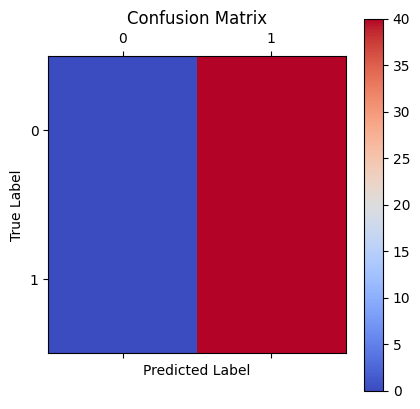

In [85]:
evaluate_model(model, test_data)


Four Conv2D

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(256, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train the model
def train_model(model, train_data, validation_data):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=20,
        verbose=1 
    )
    return history

model = create_cnn_model()
history = train_model(model, train_data, validation_data)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 867ms/step - accuracy: 0.8158 - loss: 0.4425 - val_accuracy: 0.5000 - val_loss: 1.3027
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 893ms/step - accuracy: 0.9529 - loss: 0.1314 - val_accuracy: 0.5000 - val_loss: 3.1419
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 957ms/step - accuracy: 0.9538 - loss: 0.1170 - val_accuracy: 0.5000 - val_loss: 3.7146
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 902ms/step - accuracy: 0.9808 - loss: 0.0543 - val_accuracy: 0.5000 - val_loss: 1.5404
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 877ms/step - accuracy: 0.9838 - loss: 0.0386 - val_accuracy: 0.4980 - val_loss: 2.8236
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 907ms/step - accuracy: 0.9791 - loss: 0.0501 - val_accuracy: 0.5000 - val_loss: 4.8270
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 866ms/step - accuracy: 0.9869 - loss: 0.0384 - val_accuracy: 0.5000 - val_loss: 2.5601
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 865ms/step - accuracy: 0.9817 - loss: 0.0472 - val_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step
Confusion Matrix:
 [[14 26]
 [12 28]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.54      0.35      0.42        40
   PNEUMONIA       0.52      0.70      0.60        40

    accuracy                           0.53        80
   macro avg       0.53      0.52      0.51        80
weighted avg       0.53      0.53      0.51        80



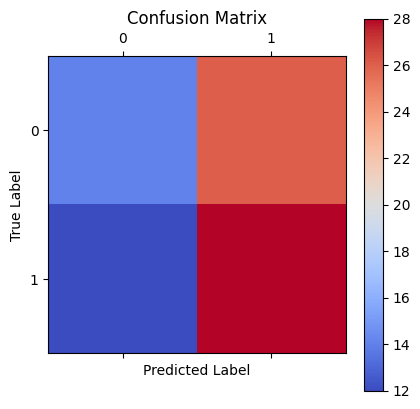

In [56]:
evaluate_model(model, test_data)


Three Conv2D

Epoch 1/20


/Users/hosein/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 831ms/step - accuracy: 0.8279 - loss: 0.4302 - val_accuracy: 0.5000 - val_loss: 10.1495
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 782ms/step - accuracy: 0.9734 - loss: 0.0745 - val_accuracy: 0.5000 - val_loss: 12.5159
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 845ms/step - accuracy: 0.9719 - loss: 0.0695 - val_accuracy: 0.5000 - val_loss: 16.6998
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 814ms/step - accuracy: 0.9741 - loss: 0.0705 - val_accuracy: 0.5000 - val_loss: 3.0048
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 837ms/step - accuracy: 0.9899 - loss: 0.0398 - val_accuracy: 0.6020 - val_loss: 1.5556
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 806ms/step - accuracy: 0.9821 - loss: 0.0432 - val_accuracy: 0.6380 - val_loss: 1.4914
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 818ms/step - accuracy: 0.9836 - loss: 0.0369 - val_accuracy: 0.6360 - val_loss: 2.0880
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 858ms/step - accuracy: 0.9905 - loss: 0.0276 - val_accuracy: 0.

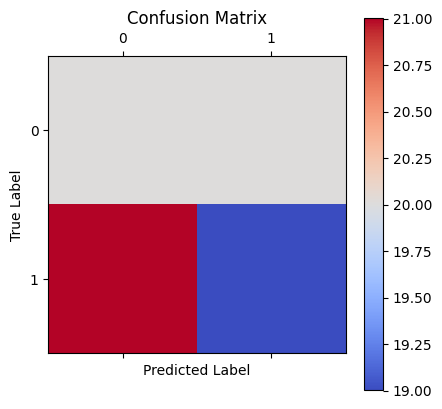

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # Conv2D(128, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(256, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train the model
def train_model(model, train_data, validation_data):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=20,
        verbose=1 
    )
    return history

model = create_cnn_model()
history = train_model(model, train_data, validation_data)
evaluate_model(model, test_data)



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step
Confusion Matrix:
 [[22 18]
 [19 21]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.54      0.55      0.54        40
   PNEUMONIA       0.54      0.53      0.53        40

    accuracy                           0.54        80
   macro avg       0.54      0.54      0.54        80
weighted avg       0.54      0.54      0.54        80



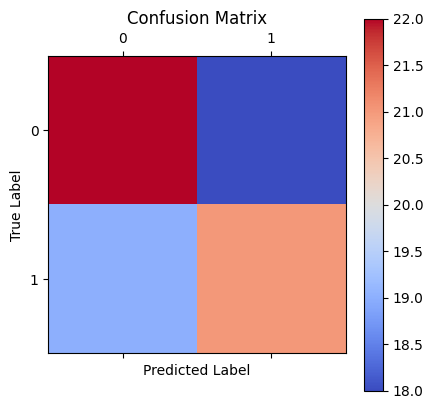

In [63]:
evaluate_model(model, test_data)


two Conv2D

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # Conv2D(128, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(128, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(256, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train the model
def train_model(model, train_data, validation_data):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=20,
        verbose=1 
    )
    return history

model = create_cnn_model()
history = train_model(model, train_data, validation_data)



Epoch 1/20


/Users/hosein/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 835ms/step - accuracy: 0.7922 - loss: 0.5655 - val_accuracy: 0.5000 - val_loss: 1.2591
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1056s 23s/step - accuracy: 0.9637 - loss: 0.0981 - val_accuracy: 0.5000 - val_loss: 3.2590
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 735ms/step - accuracy: 0.9818 - loss: 0.0540 - val_accuracy: 0.6000 - val_loss: 0.5883
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 759ms/step - accuracy: 0.9683 - loss: 0.0872 - val_accuracy: 0.5000 - val_loss: 4.1281
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 738ms/step - accuracy: 0.9889 - loss: 0.0355 - val_accuracy: 0.5000 - val_loss: 1.4451
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9906 - loss: 0.0225 - val_accuracy: 0.5760 - val_loss: 0.9488
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 987s 769ms/step - accuracy: 0.9872 - loss: 0.0377 - val_accuracy: 0.5960 - val_loss: 1.2442
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 720ms/step - accuracy: 0.9870 - loss: 0.0381 - val_accuracy: 0.5000 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
Confusion Matrix:
 [[27 13]
 [25 15]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.52      0.68      0.59        40
   PNEUMONIA       0.54      0.38      0.44        40

    accuracy                           0.53        80
   macro avg       0.53      0.53      0.51        80
weighted avg       0.53      0.53      0.51        80



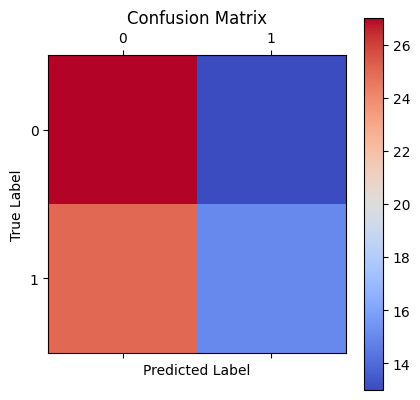

In [78]:
evaluate_model(model, test_data)

one Conv2D

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # Conv2D(64, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(128, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(128, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        # Conv2D(256, (3, 3), activation='relu', padding='same'),
        # BatchNormalization(axis=-1),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.2),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(256, activation='relu'),
        BatchNormalization(axis=-1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train the model
def train_model(model, train_data, validation_data):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=17,
        verbose=1 
    )
    return history

model = create_cnn_model()
history = train_model(model, train_data, validation_data)



Epoch 1/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7701 - loss: 0.5559 - val_accuracy: 0.5000 - val_loss: 0.8546
Epoch 2/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9451 - loss: 0.1409 - val_accuracy: 0.5000 - val_loss: 0.9891
Epoch 3/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 3752s 82s/step - accuracy: 0.9856 - loss: 0.0500 - val_accuracy: 0.5000 - val_loss: 1.2577
Epoch 4/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9937 - loss: 0.0294 - val_accuracy: 0.5000 - val_loss: 0.9953
Epoch 5/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.5000 - val_loss: 2.1803
Epoch 6/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9977 - loss: 0.0124 - val_accuracy: 0.5000 - val_loss: 2.2503
Epoch 7/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 991ms/step - accuracy: 0.9976 - loss: 0.0091 - val_accuracy: 0.7120 - val_loss: 0.6709
Epoch 8/17
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.5000 - val

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
Confusion Matrix:
 [[16 24]
 [18 22]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.47      0.40      0.43        40
   PNEUMONIA       0.48      0.55      0.51        40

    accuracy                           0.47        80
   macro avg       0.47      0.48      0.47        80
weighted avg       0.47      0.47      0.47        80



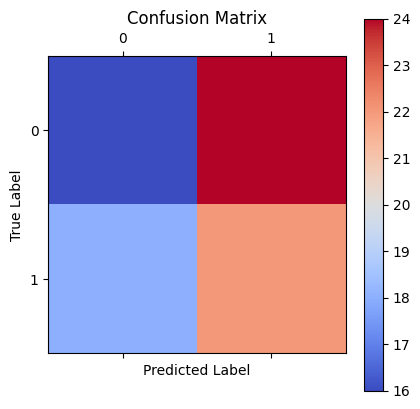

In [19]:
evaluate_model(model, test_data)